In [6]:
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
import cartopy.crs as ccrs
%matplotlib inline

In [9]:
import geohash

In [10]:
xmin = -180
ymin = -90
xmax = 180
ymax = 90

In [25]:
codes = sorted(geohash.string.bounding_boxes(
    geohash.Box(geohash.Point(xmin, ymin),
                geohash.Point(xmax, ymax)), 1))

In [32]:
def plot_box(ax, code, color, caption=True):
    box = geohash.string.bounding_box(code)
    x0 = box.min_corner.lng
    x1 = box.max_corner.lng
    y0 = box.min_corner.lat
    y1 = box.max_corner.lat
    dx = x1 - x0
    dy = y1 - y0
    box = mpatch.Rectangle(
        (x0, y0), dx, dy,
        alpha=0.5, color=color, ec="black", lw=1, transform=ccrs.PlateCarree())
    ax.add_artist(box)
    if not caption:
        return
    rx, ry = box.get_xy()
    cx = rx + box.get_width() * 0.5
    cy = ry + box.get_height() * 0.5
    ax.annotate(code.decode(), (cx, cy), color='w', weight='bold', 
                fontsize=12, ha='center', va='center')

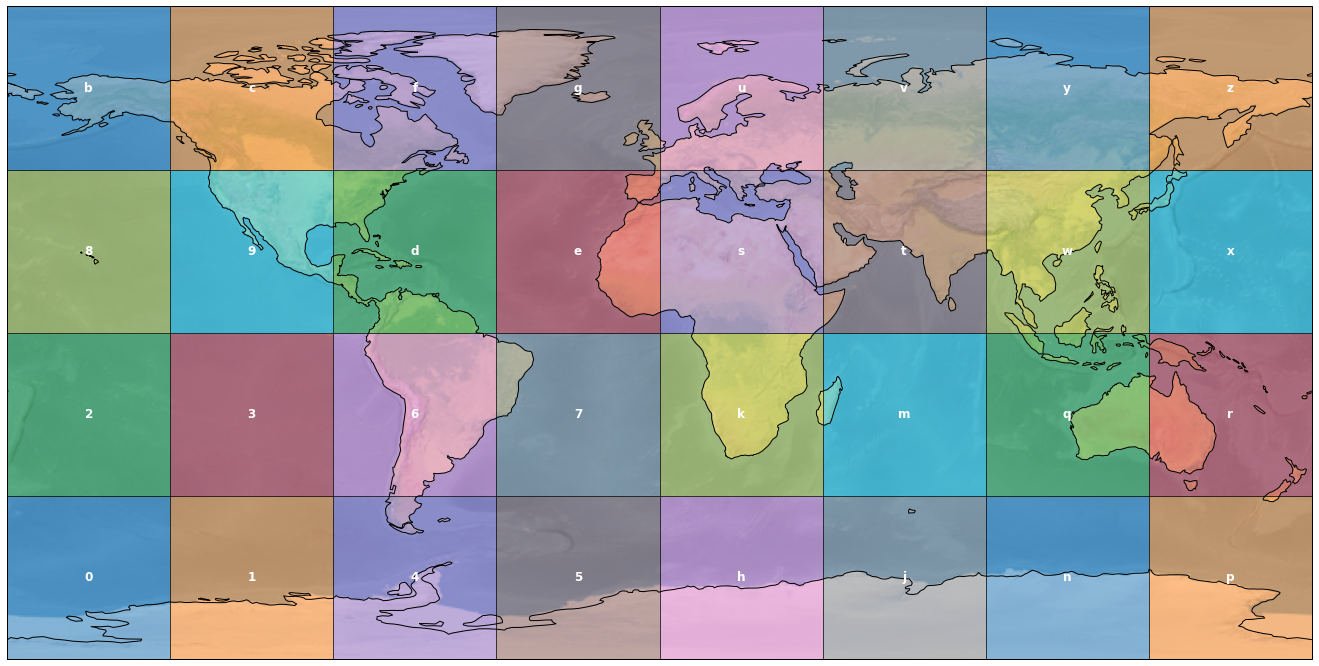

In [33]:
fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
code=codes[0]
ic = 0
color = colors[ic]
for ix, item in enumerate(codes):
    if code != item:
        ic += 1
        color = colors[ic % len(colors)]
        code = item
    plot_box(ax, item, color, True)
ax.stock_img()
ax.coastlines()
ax.grid()